 # **Twitter Network Map Data Extraction, Pre-Processing and Analysis**
 **Name**: Jason Dookarun \& Charith Avancha Fragoso   
 **Student Number**: 26017434 \& 28004779  
 **Module Code**: CS3PP19: Programming in Python for Data Science  
 **Time Spent**: 40 Hours  
 **Module Evaluation**: Studied the applications of data science, comprehended the purposes and effectiveness of Twitter APIs, understood the usage of Tweepy, NetworkX and additional tools.

---



## Influencers Used

Mercedes F1 Racing team: @MercedesAMGF1 \
Redbull F1 Racing team: @Redbullracing \
McLaren F1 Racing team: @McLarenF1

# **Task 1: Data Gathering and Pre-Processing**

### Task 1 Explanation

For this project, we will be browsing a selection of three Twitter handles, namely MercedesAMGF1, McLarenF1 and RedBullRacing, all three being representatives of constructors in the Formula One sport. To initiate the retrieval of data, an application was submitted to Twitter Developers to give us the appropriate role to access certain levels of data access, later used as part of this task. Once the level of access was granted, an API connection was granted by using consumer key and secret, access token and access token secret followed by a bearer token. All of the mentioned were used, however, due to privacy, the keys have not been included as part of this submission.

To commence, the keys are to be initialised with an authenticator to verify the authenticity. Tweepy will be used to verify the API connection following the declaration. Once such is achieved, each account will be filtered to look into certain filters including most recent 300 tweets, with additional information such as ID, Creation Date/Time etc. Post this process, we intend to use Pandas Dataframe to appropriately create headers (ID, CREATED AT, FAVOURITE, RETWEET COUNT, TEXT) and a data frame to a .csv file as an output, an a vieweable file to see the listed stats, with an expected 300 tweeets, and 301 rows (including headers).

### Tweet Extraction, Pandas DF and CSV file code

In [ ]:
import tweepy #https://github.com/tweepy/tweepy
import csv
from pandas import DataFrame
import pandas as pd

#Twitter API credentials (add personal credentials)
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''
bearer_token = ''


merc = 'MercedesAMGF1'
redbull = 'RedBullRacing'
mclaren = 'McLarenF1'

def get_tweets(): 
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)
    api = tweepy.API(auth)

    num_of_tweets = 300
    tweetid = []
    tweets = []
    likes = []
    time = []
    retweets = []
    
    for x in tweepy.Cursor(api.user_timeline,screen_name='MercedesAMGF1',tweet_mode='extended').items(num_of_tweets):
        tweetid.append(x.id_str)
        tweets.append(x.full_text)
        likes.append(x.favorite_count)
        time.append(x.created_at)
        retweets.append(x.retweet_count)

    df = pd.DataFrame({'id':tweetid,'tweets':tweets, 'likes':likes, 'time':time,'retweets':retweets})
    df.to_csv('%s_T1Output.csv' % merc,index=False)
    df.head(3)

def get_redbull_tweets():
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)
    api = tweepy.API(auth)

    num_of_tweets = 300
    tweetid = []
    tweets = []
    likes = []
    time = []
    retweets = []
    
    for y in tweepy.Cursor(api.user_timeline,screen_name='RedBullRacing',tweet_mode='extended').items(num_of_tweets):
        tweetid.append(y.id_str)
        tweets.append(y.full_text)
        likes.append(y.favorite_count)
        time.append(y.created_at)
        retweets.append(y.retweet_count)

    df = pd.DataFrame({'id':tweetid,'tweets':tweets, 'likes':likes, 'time':time,'retweets':retweets})
    df.to_csv('%s_T1Output.csv' % redbull,index=False)
    df.head(3)

def get_mclaren_tweets():
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)
    api = tweepy.API(auth)

    num_of_tweets = 300
    tweetid = []
    tweets = []
    likes = []
    time = []
    retweets = []
    
    for z in tweepy.Cursor(api.user_timeline,screen_name='McLarenF1',tweet_mode='extended').items(num_of_tweets):
        tweetid.append(z.id_str)
        tweets.append(z.full_text)
        likes.append(z.favorite_count)
        time.append(z.created_at)
        retweets.append(z.retweet_count)

    df = pd.DataFrame({'id':tweetid,'tweets':tweets, 'likes':likes, 'time':time,'retweets':retweets})
    df.to_csv('%s_T1Output.csv' % mclaren,index=False)
    df.head(3)


get_tweets()
get_redbull_tweets()
get_mclaren_tweets()


NameError: name 'access_secret' is not defined

### Task 1 Findings, Justification and Lessons Learned

Post tweet retrieval, we discovered a few elements, later discussed. Some of the issues we faced were surrounding methods to retrieve tweets. As per our understanding, we felt that by using user_timeline, we were capped to a maximum of 200 tweets. To overcome this issue, we decided to use Tweepy.Cursor. However, when using this method, a lot more declarations were required, and due to the lack of knowledge, we were able to comprehend the requirements of these parameters. Likewise, we had numerous instances where we had a statement twice to overcome the tweet retrieval. 

We successfully managed to overcome this by using a for loop and a cursor declaring the number of tweets. Likewise, we then implemented individual arrays for each category as an alternative to having a singular array. By using such, we were able to later apply testing to ensure data retrieval was successful. 

Finally, to replicate this procedure three times for each profile, 3 individual methods were implemented. 

Likewise, we discovered that if a data cleanse was to be applied, the total number of tweets retrieved would not meet the set expectation. Moreover, post data cleanse, the number of tweets may fluctuate dependent on the number of RT (retweets) made by the account.

Following this task, we learnt the purpose of additional methods available in the Tweepy documentation (found in Tweepy docs) to appropriately filter data such as looking at Twitter ID, a screen name (Twitter handle) and additional caveats. 

# **Task 2: Exploratory Data Analysis (EDA)**



### Task 2 Explanation

In this task, we compared different analytics of the chosen influencer accounts. We compared the Number of followers, the number of tweets and the account creation date for the 3 accounts. From the first task, we used the API features to gain access to the account information. The API user module was then initialised to access the information required, first we got the unique user ID that are given to twitter accounts upon creation, this was then initialised to a relevant variable name and set to the user variable using get_user(id=''). Once this was done, each account had a different variable name for the user.followers_count, user.statuses_count and user.created_at.

Once we got this information, it was inputted into a pandas DataFrame for comparison and analysis. Here, we were clearly able to see the account with the highest follower count, the most tweets and the oldest account creation date.

The pandas DataFrame was formatted using a dictionary, meaning that for 3 accounts, there were 4 columns: TwitterHandles, NumberofFollowers, NumberofTweets and AccountCreationDate. Each of these columns were created with an array within the dictionary as it made it easier to handle the information. Each array however, had to be the same size, meaning that for each account, we had to create individual variables in order to reach the requirments for the dictionary array to work. 

For the Data Analysis, we used the groupby method to sort the information to just include the TwitterHandles plus one other column in descending order (ascending order for the date). This showed us more clearly, which account had the most tweets, most followers and oldest account. 

Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
____________________________________________
Account with greatest number of followers in descending order 
  TwitterHandles  NumberofFollowers
1  MercedesAMGF1            3546858
2  RedBullRacing            3450470
0        McLaren            2808758
____________________________________________
Account with greatest number of tweets in descending order 
  TwitterHandles  NumberofTweets
1  MercedesAMGF1          130028
0        McLaren           44755
2  RedBullRacing           30167
____________________________________________
Account with the oldest creation date in descending order 
  TwitterHandles       AccountCreationDate
0        McLaren 2009-03-17 12:07:30+00:00
1  MercedesAMGF1 2009-03-24 13:24:04+00:00
2  RedBullRacing 2010-12-13 08:12:04+00:00
____________________________________________


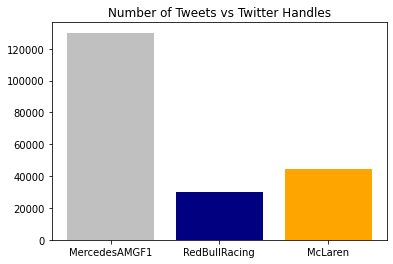

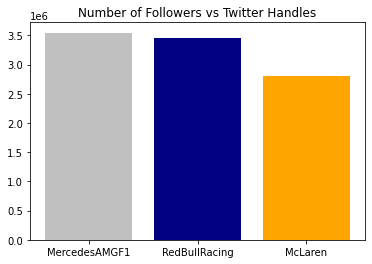

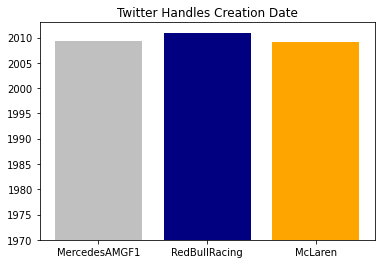

Account with the oldest creation date in descending order 
  TwitterHandles       AccountCreationDate
0        McLaren 2009-03-17 12:07:30+00:00
1  MercedesAMGF1 2009-03-24 13:24:04+00:00
2  RedBullRacing 2010-12-13 08:12:04+00:00
____________________________________________


In [ ]:
import tweepy #https://github.com/tweepy/tweepy
import csv
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import numpy as np

#Twitter API credentials (add personal credentials)
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''
bearer_token = ''


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)


# the ID of the user
merc = 26235265
# fetching the user
user = api.get_user(id=merc)
mestatuses_count = user.statuses_count 
mefollowers_count = user.followers_count
metwitterage = user.created_at


# fetching the statuses_count attribute
mclaren = 24871896 
user = api.get_user(id=mclaren)
mcstatuses_count = user.statuses_count
mcfollowers_count = user.followers_count
mctwitterage = user.created_at


idRB = 226087776
user = api.get_user(id=idRB)
# fetching the statuses_count attribute
rbfollowers_count = user.followers_count
rbstatuses_count = user.statuses_count 
rbtwitterage = user.created_at


dict = {'TwitterHandles': ['MercedesAMGF1', 'RedBullRacing', 'McLaren'],
        'NumberofFollowers':[mefollowers_count, rbfollowers_count, mcfollowers_count],
        'NumberofTweets':[mestatuses_count, rbstatuses_count, mcstatuses_count],
        'AccountCreationDate':[metwitterage, rbtwitterage, mctwitterage]
    }

df = pd.DataFrame(dict)


print("____________________________________________")
print("Account with greatest number of followers in descending order ")
print(df.groupby('TwitterHandles')['NumberofFollowers'].max().reset_index().sort_values(['NumberofFollowers'], ascending=False))
print("____________________________________________")
print("Account with greatest number of tweets in descending order ")
print(df.groupby('TwitterHandles')['NumberofTweets'].max().reset_index().sort_values(['NumberofTweets'], ascending=False))
print("____________________________________________")
print("Account with the oldest creation date in descending order ")
print(df.groupby('TwitterHandles')['AccountCreationDate'].max().reset_index().sort_values(['AccountCreationDate'], ascending=True))
print("____________________________________________")


bars = ('MercedesAMGF1', 'RedBullRacing', 'McLarenF1')
x_pos = np.arange(len(bars))
height = df.NumberofFollowers
plt.bar(df.TwitterHandles, df.NumberofTweets, color=['silver', 'navy', 'orange',])
# df.plot(x ='TwitterHandles', y='NumberofFollowers', kind = 'bar')
plt.title("Number of Tweets vs Twitter Handles", loc='center', pad=None)
plt.show()

# df.plot(x ='TwitterHandles', y='NumberofFollowers', kind = 'pie')
# my_labels = 'MercedesAMGF1','RedBullRacing','McLarenF1'
# plt.pie(df,labels=my_labels,autopct='%1.1f%%')
plt.bar(df.TwitterHandles, df.NumberofFollowers, color=['silver', 'navy', 'orange',])
plt.title("Number of Followers vs Twitter Handles", loc='center', pad=None)
plt.show()


plt.bar(df.TwitterHandles, df.AccountCreationDate, color=['silver', 'navy', 'orange',])
plt.title("Twitter Handles Creation Date", loc='center', pad=None)
plt.show()



print("Account with the oldest creation date in descending order ")
print(df.groupby('TwitterHandles')['AccountCreationDate'].max().reset_index().sort_values(['AccountCreationDate'], ascending=True))
print("____________________________________________")



## NOTES _________________________________________________________________________________________

## TODO: CHECK THE CODE FOR THE ACCOUNT FOLLOWING

### Task 2 Findings, Justification and Lessons Learned

With task 2, the main problem was an error with the get_user method. The error kept telling us that the method requires 1 positional argument but 2 were given. After we took a look at the method definiton, we realised that there are 3 parameters that need to be declared. These parameters were: id, screen_name, user_id. Initially we were only including the actual screen name or twitter id, this meant that the method did not know which parameter to declare this argument to. The fix for this ended up being that we had to declare any of the parameters we were using, in our case, we did: id = merc, where merc was declared as the unique twitter ID for MercedesAMGF1. Once resolving this issue, we managed to easily and quickly retrieve the rest of the information such as the follower count and 
the number of tweets. 

We also had trouble with the groupby method. We were not able to merge together a query (finding highest amount of followers) where we tried to display just two columns of the dataframe. We worked around this issue by separating each query and displaying them as individual tables. 

The dictionary was a very intuative method of showing all the all the collected data as a Data Frame. Although we had to create individual variables for each influencer, it allowed us to directly implement this into a pandas DataFrame. Displaying this showed a clear and neat represenation of the data that was collected for the task. 

# **Task 3: Network Analysis**

### Task 3 Explained

In this task we created a network using the following list from each influencer. We then extracted 10 different user ids from the following list and displayed them as a topology to show the network that the influencer has created. Each influencer has a topology each to show their network. We then looked at each node and calculated the cluster coefficient for each node in the topology. This then was plotted on a bar graph as seen below. 

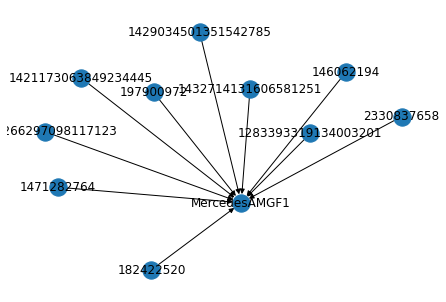

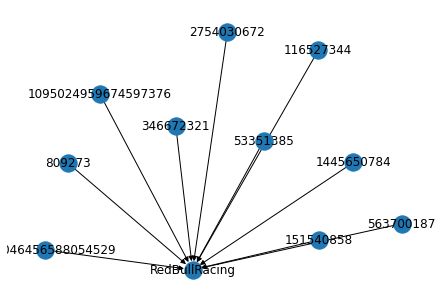

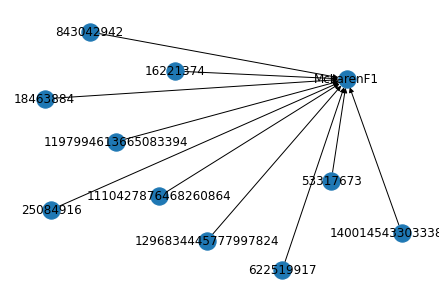

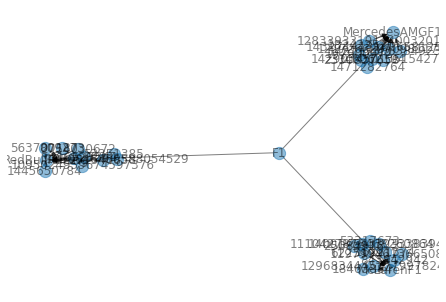

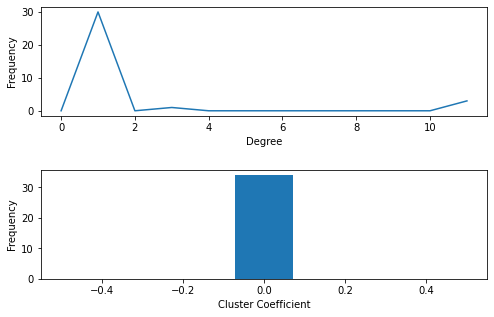

In [ ]:
import tweepy #https://github.com/tweepy/tweepy
import csv
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import numpy as np
##We can create an unidirectional network
import networkx as nx
import configparser
from tweepy import API, Cursor, OAuthHandler

#Twitter API credentials (add personal credentials)
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''
bearer_token = ''


# Authenticate Tweepy connection to Twitter API
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

friendIDList = []
RBfriendIDList = []
McfriendIDList = []
merc = []
temp = []
mc = []
rb = []
temp.append(merc)
temp.append(rb)
temp.append(mc)

Mercscreen_name = 'MercedesAMGF1'
Mercfriends = (api.get_friend_ids(screen_name = Mercscreen_name, count = 10))

for id in Mercfriends:
      friendIDList.append(str(id))       
      merc.append('MercedesAMGF1')


data_frame= pd.DataFrame({'FriendID':friendIDList}) 
data_frame['InfluencerHandle'] = pd.Series(merc, index=data_frame.index)

RBscreen_name = 'RedBullRacing'
RBfriends = (api.get_friend_ids(screen_name = RBscreen_name, count = 10))

       

for RBid in RBfriends:
        RBfriendIDList.append(str(RBid))
        rb.append('RedBullRacing')

data_frame1= pd.DataFrame({'FriendID':RBfriendIDList}) 
data_frame1['InfluencerHandle'] = pd.Series(rb, index= data_frame1.index)

Mcscreen_name = 'McLarenF1'
Mcfriends = (api.get_friend_ids(screen_name = Mcscreen_name,count = 10))


for Mcid in Mcfriends:
        McfriendIDList.append(str(Mcid))
        mc.append('McLarenF1')

data_frame2= pd.DataFrame({'FriendID':McfriendIDList}) 
data_frame2['InfluencerHandle'] = pd.Series(mc, index=data_frame2.index)

frames = [data_frame, data_frame1, data_frame2]
result = pd.concat(frames)
result.to_csv('T3.csv')


# Build your graph
GMerc = nx.from_pandas_edgelist(data_frame, 'FriendID' , 'InfluencerHandle', create_using=nx.DiGraph())
# Plot it
nx.draw(GMerc, with_labels = True)
plt.show()

# Build your graph
GRB = nx.from_pandas_edgelist(data_frame1, 'FriendID' , 'InfluencerHandle', create_using=nx.DiGraph())
# Plot it
nx.draw(GRB, with_labels = True)
plt.show()

# Build your graph
GMCL = nx.from_pandas_edgelist(data_frame2, 'FriendID' , 'InfluencerHandle', create_using=nx.DiGraph())
# Plot it
nx.draw(GMCL, with_labels = True)
plt.show()


F = nx.compose(GMerc, GRB)
X = nx.compose (F, GMCL)

X.add_edge('F1', 'MercedesAMGF1', length = 2)
X.add_edge('F1', 'RedBullRacing', length = 2)
X.add_edge('F1', 'McLarenF1', length = 2)

layout = nx.spring_layout(X)
nx.draw(X,pos=layout,node_size=150,alpha=0.5, with_labels = True)
plt.show()

plt.figure(1, figsize=(8,8))
plt.subplots_adjust(hspace=0.5)


plt.subplot(3,1,1)
dh = nx.degree_histogram(X)
plt.plot(dh)
plt.ylabel("Frequency")
plt.xlabel("Degree")


cc = nx.clustering(X)
cc

plt.subplot(3,1,2)
plt.hist(list(cc.values()),bins=7)
plt.ylabel("Frequency")
plt.xlabel("Cluster Coefficient")

plt.show()




### Task 3: Findings, Justifications and Lessons Learned

Following the completion of Task 3, a series of topologies were produced. To commence, we initiated the creation of graphs with the appropriate nodes. To achieve the mentioned we commenced by retrieving all the appropriate friend_ids linked to each influencer, namely Mercedes AMG F1, Red Bull Racing and McLaren appropriately. Once the API attachment was made to each influencer, a for loop was introduced for each influencer to retrieve a total of 10 friend_ids (following twitter ID) and attach the data found to a data frame, later used for network analysis. Additionally, the same process was repeated for both McLaren and Red Bull Racing. To ensure that the data collected was in the appropriate format, a concatenation was conducted with all three individual data frames and exported to a .csv file titled "T3.csv".

Once the standard was met, networkx (a library used for network analysis) was implemented by using a conversion method (nx.from_pandas_edgelist). Each data frame was then illustrated through a network topology. As shown by the first three illustrations, each friend_id earlier retrieved were correctly linked to the host node (influencer name) via an edge. To ensure the graphs produced were bidirectional, an additional parameter was provided during the creation of the graphs. As a result, the final illustration produced a standard node to edge graph with an additional illustration to represent the bidirectional attribute. 

To calculate and conduct a clustering coefficient, we conducted the findings on an individual basis i.e. per influencer. Once a value was found, an update() method was used to merge the results into another graph as transferring the mentioned would format the results in an inappropriate format. Based upon our findings and the plot illustration in a histogram format, the result of 0.5 was correct as each friend_id per graph only has a single connection point, back to the root node (influencer ID). Likewise, the graph illustrates a frequency of 30+ was produced. Such occurred due to the consideration of header rows consisting of information being accumulated to the total frequency. Likewise, additional nodes were added such as F1 to create a connection point between graphs.

Unfortunately, one of the errors we encountered was the merging of graphs and presenting this. When presenting a merge result, compression was applied, and as a result, values are not visible, making it difficult to verify the likelihood that the data is correct. To overcome this issue, each network topology was presented individually, to preserve the data accuracy. 

Additionally, one of the issues we confronted was the connection of graphs. As per our initial findings from previous tasks, we intended to merge all three graphs by creating a matching node, titled 'F1'. These nodes were designed with the purpose to have an additional edge connection between F1 to other influencer names. However, after additional research on how to link each graph together. By doing so, we encountered issues such as the topology illustrating that McLaren presented a separation. However, we concluded that this simply may have been a system glitch, as previous representations confirmed that McLaren was linked appropriately to other nodes.



### Conclusion

To conclude, the process of extracting tweets and Twitter users from the tweepy API was a learning curve. Figuring out which API methods to use that worked best with our implementation and structure. The data gathering initially produced inaccurate results, which we then spent time learning how to improve and show in a clear and concise way. We began the project by using the built-in python twitter package that comes with the base python language. However, we ran into many problems involving API objects and attributes. With the second task, we looked at EDA, where we decided to analyse the number of followers, number of tweets and the creation date of the accounts. We thought that comparing when the accounts were created to how many followers and tweets the influencers had was a good analysis to go through. It also helped us learn effective ways of data analysis. A number of retweets were also taken into consideration, however, this parameter resulted in a very long-winded and complicated process, thus this was removed. The final task caused the most difficulty, the theory of network analysis was straightforward, however, the process of programming the analysis became a very steep learning curve. The graphs and network topologies created to show the network analysis took a lot of trial and error as well as research into the lecture notes amongst other resources. A couple of the analysis techniques/methods were left out due to them not working out for us or not being able to understand them.


### References

https://gouldguides.carleton.edu/dataknowledgebase/twitterapi
https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.number_of_edges.html
https://www.geeksforgeeks.org/python-tweepy-getting-the-number-of-followers-of-a-user/
https://www.geeksforgeeks.org/select-row-with-maximum-and-minimum-value-in-pandas-dataframe/
https://www.geeksforgeeks.org/how-to-add-one-row-in-an-existing-pandas-dataframe/
https://www.stechies.com/valueerror-using-scalar-values-must-pass-index/
https://towardsdatascience.com/twitter-data-mining-measuring-users-influence-ef76c9badfc0
https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/twitter-data-in-python/
https://towardsdatascience.com/extracting-data-from-semi-structured-tweets-using-pandas-and-regex-2f293588c1dd
https://twitter.com/McLarenF1
https://twitter.com/MercedesAMGF1
https://twitter.com/redbullracing


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c7d6230d-cfd4-4a38-a644-a0af2e127f5a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>